<a href="https://colab.research.google.com/github/Ayanlola2002/17-life-expectancy/blob/master/Life_expectancy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
#mounting Gdrive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
#unzippig the us-data file
from shutil import unpack_archive
#unpack_archive('all.zip')
unpack_archive('/content/drive/My Drive/Life_expectancy/life_expectancy.zip')


In [19]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points

In [20]:
data = pd.read_csv('/content/drive/My Drive/Life_expectancy/Life Expectancy Data.csv')

In [21]:
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.000,263.000,62,0.010,71.280,65.000,1154,19.100,83,6.000,8.160,65.000,0.100,584.259,33736494.000,17.200,17.300,0.479,10.100
1,Afghanistan,2014,Developing,59.900,271.000,64,0.010,73.524,62.000,492,18.600,86,58.000,8.180,62.000,0.100,612.697,327582.000,17.500,17.500,0.476,10.000
2,Afghanistan,2013,Developing,59.900,268.000,66,0.010,73.219,64.000,430,18.100,89,62.000,8.130,64.000,0.100,631.745,31731688.000,17.700,17.700,0.470,9.900
3,Afghanistan,2012,Developing,59.500,272.000,69,0.010,78.184,67.000,2787,17.600,93,67.000,8.520,67.000,0.100,669.959,3696958.000,17.900,18.000,0.463,9.800
4,Afghanistan,2011,Developing,59.200,275.000,71,0.010,7.097,68.000,3013,17.200,97,68.000,7.870,68.000,0.100,63.537,2978599.000,18.200,18.200,0.454,9.500


In [22]:
data.shape

(2938, 22)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [24]:
data.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [25]:
def missing_values(df):
    missing=pd.DataFrame(df.isnull().sum()/len(data))*100
    missing.columns = ['missing_values(%)']
    missing['missing_values(numbers)'] = pd.DataFrame(df.isnull().sum())
    return missing.sort_values(by='missing_values(%)', ascending=False)
missing_values(data)

,missing_values(%),missing_values(numbers)
Population,22.192,652
Hepatitis B,18.822,553
GDP,15.248,448
Total expenditure,7.692,226
Alcohol,6.603,194
Income composition of resources,5.684,167
Schooling,5.548,163
thinness 5-9 years,1.157,34
thinness 1-19 years,1.157,34
BMI,1.157,34


In [26]:
# Renaming some column names as they contain trailing spaces.
data.rename(columns={" BMI ":"BMI","Life expectancy ":"Life_Expectancy","Adult Mortality":"Adult_Mortality",
                   "infant deaths":"Infant_Deaths","percentage expenditure":"Percentage_Exp","Hepatitis B":"HepatitisB",
                  "Measles ":"Measles","under-five deaths ":"Under_Five_Deaths","Diphtheria ":"Diphtheria",
                  " HIV/AIDS":"HIV/AIDS"," thinness  1-19 years":"thinness_1to19_years"," thinness 5-9 years":"thinness_5to9_years","Income composition of resources":"Income_Comp_Of_Resources",
                   "Total expenditure":"Tot_Exp"},inplace=True)

In [27]:
#replace all missing values with median
for label,content in data.items():
    if pd.isnull(content).sum():
        data[label] = content.fillna(content.median())

In [28]:
#recheck to see if we have handled missing values
missing_values(data)

,missing_values(%),missing_values(numbers)
Country,0.000,0
Year,0.000,0
Income_Comp_Of_Resources,0.000,0
thinness_5to9_years,0.000,0
thinness_1to19_years,0.000,0
Population,0.000,0
GDP,0.000,0
HIV/AIDS,0.000,0
Diphtheria,0.000,0
Tot_Exp,0.000,0


In [29]:
#handling categorical values
data=pd.get_dummies(data, columns=['Country','Status'])

In [30]:
#creating train and predictor data
X = data.drop('Life_Expectancy', axis=1)
y = data['Life_Expectancy']

In [31]:
X.head()

,Year,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Exp,HepatitisB,Measles,BMI,Under_Five_Deaths,Polio,Tot_Exp,Diphtheria,HIV/AIDS,GDP,Population,thinness_1to19_years,thinness_5to9_years,Income_Comp_Of_Resources,Schooling,Country_Afghanistan,Country_Albania,Country_Algeria,Country_Angola,Country_Antigua and Barbuda,Country_Argentina,Country_Armenia,Country_Australia,Country_Austria,Country_Azerbaijan,Country_Bahamas,Country_Bahrain,Country_Bangladesh,Country_Barbados,Country_Belarus,Country_Belgium,Country_Belize,Country_Benin,Country_Bhutan,Country_Bolivia (Plurinational State of),Country_Bosnia and Herzegovina,...,Country_Slovenia,Country_Solomon Islands,Country_Somalia,Country_South Africa,Country_South Sudan,Country_Spain,Country_Sri Lanka,Country_Sudan,Country_Suriname,Country_Swaziland,Country_Sweden,Country_Switzerland,Country_Syrian Arab Republic,Country_Tajikistan,Country_Thailand,Country_The former Yugoslav republic of Macedonia,Country_Timor-Leste,Country_Togo,Country_Tonga,Country_Trinidad and Tobago,Country_Tunisia,Country_Turkey,Country_Turkmenistan,Country_Tuvalu,Country_Uganda,Country_Ukraine,Country_United Arab Emirates,Country_United Kingdom of Great Britain and Northern Ireland,Country_United Republic of Tanzania,Country_United States of America,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela (Bolivarian Republic of),Country_Viet Nam,Country_Yemen,Country_Zambia,Country_Zimbabwe,Status_Developed,Status_Developing
0,2015,263.000,62,0.010,71.280,65.000,1154,19.100,83,6.000,8.160,65.000,0.100,584.259,33736494.000,17.200,17.300,0.479,10.100,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2014,271.000,64,0.010,73.524,62.000,492,18.600,86,58.000,8.180,62.000,0.100,612.697,327582.000,17.500,17.500,0.476,10.000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,2013,268.000,66,0.010,73.219,64.000,430,18.100,89,62.000,8.130,64.000,0.100,631.745,31731688.000,17.700,17.700,0.470,9.900,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,2012,272.000,69,0.010,78.184,67.000,2787,17.600,93,67.000,8.520,67.000,0.100,669.959,3696958.000,17.900,18.000,0.463,9.800,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,2011,275.000,71,0.010,7.097,68.000,3013,17.200,97,68.000,7.870,68.000,0.100,63.537,2978599.000,18.200,18.200,0.454,9.500,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [32]:
#Now let's split our model into training & test set.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=42)

In [33]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2350, 214), (588, 214), (2350,), (588,))

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
gbr_pred = gbr.predict(X_test)
print('R2 score is : {:.2f}'.format(r2_score(y_test, gbr_pred)))

R2 score is : 0.95


In [35]:
#making a copy of our data
df = data.copy()

In [36]:
#checking for outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers = pd.DataFrame(((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum())
outliers1= outliers[:60]
outliers2 = outliers[60:120]
outliers3 = outliers[120:180]
outliers4 = outliers[180:]
outliers1,outliers2,outliers3,outliers4

(                                            0
 Year                                        0
 Life_Expectancy                            17
 Adult_Mortality                            86
 Infant_Deaths                             315
 Alcohol                                     3
 Percentage_Exp                            389
 HepatitisB                                322
 Measles                                   542
 BMI                                         0
 Under_Five_Deaths                         394
 Polio                                     279
 Tot_Exp                                    51
 Diphtheria                                298
 HIV/AIDS                                  542
 GDP                                       445
 Population                                452
 thinness_1to19_years                      100
 thinness_5to9_years                        99
 Income_Comp_Of_Resources                  130
 Schooling                                  77
 Country_Afgh

In [38]:
#Wow ! Almost all of the features have outliers.
#So instead of taking care of these outliers,we use RandomForestRegressor
#since its really robust and immune to outliers.
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [39]:
rf_pred=rf.predict(X_test)

In [40]:
#Let's evaluate our model.
print('R2 score is : {:.2f}'.format(r2_score(y_test, rf_pred)))

R2 score is : 0.97


In [41]:
#Now let's take a look at important features according to our model.
rf.feature_importances_

array([6.79627248e-03, 1.31878793e-01, 4.80376116e-03, 5.48962397e-03,
       3.11887089e-03, 1.43976540e-03, 3.70950405e-03, 1.60705578e-02,
       1.15258855e-02, 3.75854345e-03, 3.88356516e-03, 2.67420795e-03,
       5.93803824e-01, 3.43955481e-03, 2.66500824e-03, 4.40211390e-03,
       8.20093171e-03, 1.69979418e-01, 9.25190055e-03, 1.67881147e-04,
       1.92470894e-05, 2.42999064e-06, 6.15784786e-04, 6.61729640e-06,
       6.66617696e-05, 5.31603683e-06, 9.58140775e-07, 2.06104442e-05,
       2.91606869e-04, 9.95198105e-06, 1.30576590e-06, 1.54183316e-05,
       5.38508014e-06, 3.21658292e-06, 2.42000822e-05, 1.76448650e-04,
       3.79057675e-05, 1.27718247e-05, 5.30494064e-05, 3.69311752e-05,
       1.61758899e-05, 2.66935370e-06, 5.95651243e-06, 2.98541559e-05,
       2.33103916e-05, 2.16198651e-05, 2.14156869e-04, 2.51266006e-05,
       1.54332172e-05, 5.26034361e-06, 2.58209376e-05, 1.62947897e-05,
       1.19459687e-05, 2.69580798e-05, 3.66606898e-06, 1.94628715e-05,
      

In [42]:
#Let's look at the top 10 features.
import seaborn as sns
# Helper function for plotting feature importance
def plot_features(columns, importances, n=15):
    df = (pd.DataFrame({"features": columns,
                        "feature_importance": importances})
          .sort_values("feature_importance", ascending=False)
          .reset_index(drop=True))
    
    sns.barplot(x="feature_importance",
                y="features",
                data=df[:n],
                orient="h")

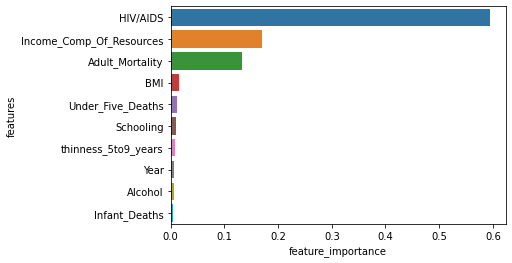

In [43]:
plot_features(X_train.columns, rf.feature_importances_)

In [ ]:
'''Hmmm, top 10 features according to our model are :

'HIV/AIDS','Income_Comp_Of_Resources','Adult_Mortality','BMI','Under_Five_Deaths',
'Schooling','thinness_5to9_years','Year','Alcohol','thinness_1to19_years'.

So let's just use these 10 features and see if the model still works good.

Because as a data scientist, we should always look at ways to cut down computational costs. And that can happen when you reduce the dimension of your data.
'''

In [44]:
new_data = data[['HIV/AIDS','Adult_Mortality','Income_Comp_Of_Resources','Schooling',
      'BMI','thinness_5to9_years','Under_Five_Deaths','Infant_Deaths',
      'thinness_1to19_years','Year']]

In [45]:
new_data

,HIV/AIDS,Adult_Mortality,Income_Comp_Of_Resources,Schooling,BMI,thinness_5to9_years,Under_Five_Deaths,Infant_Deaths,thinness_1to19_years,Year
0,0.100,263.000,0.479,10.100,19.100,17.300,83,62,17.200,2015
1,0.100,271.000,0.476,10.000,18.600,17.500,86,64,17.500,2014
2,0.100,268.000,0.470,9.900,18.100,17.700,89,66,17.700,2013
3,0.100,272.000,0.463,9.800,17.600,18.000,93,69,17.900,2012
4,0.100,275.000,0.454,9.500,17.200,18.200,97,71,18.200,2011
...,...,...,...,...,...,...,...,...,...,...
2933,33.600,723.000,0.407,9.200,27.100,9.400,42,27,9.400,2004
2934,36.700,715.000,0.418,9.500,26.700,9.900,41,26,9.800,2003
2935,39.800,73.000,0.427,10.000,26.300,1.300,40,25,1.200,2002
2936,42.100,686.000,0.427,9.800,25.900,1.700,39,25,1.600,2001


In [47]:
X_train, X_test, y_train, y_test = train_test_split(new_data,y, test_size=0.2, random_state=42)

In [48]:
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [50]:
rf_pred_new = rf.predict(X_test)

In [51]:
print('R2 score is : {:.2f}'.format(r2_score(y_test, rf_pred_new)))

R2 score is : 0.97


In [52]:
rf_pred_new = pd.DataFrame(rf_pred_new)

In [ ]:
rf_pred_new.to_csv('predictions.csv')